# Analysis after Peak-calling with MACS2

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
def readBroadPeak(file, qthreshold=0.01, lenthreshold=250):
    data = pd.read_csv(file, sep='\t', header=None, 
            names = ['Chrom', 'start', 'end', 'name', 'score', '.', 'fc', 'neglogp', 'neglogq'])
    data['len'] = abs(data['start'] - data['end'])
    export_data = data[(data.neglogq >= (-1)*np.log10(qthreshold)) & (data.len >= lenthreshold)]
    export_data = export_data.drop(columns=['len'])
    return export_data

In [88]:
IRI1A = readBroadPeak('./IRI1A_peaks.broadPeak')
IRI2A = readBroadPeak('./IRI2A_peaks.broadPeak')
SHAM1A = readBroadPeak('./Sham1A_peaks.broadPeak')
SHAM2A =  readBroadPeak('./Sham2A_peaks.broadPeak')

In [89]:
IRI1A.to_csv("./IRI1A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
IRI2A.to_csv("./IRI2A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
SHAM1A.to_csv("./SHAM1A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)
SHAM2A.to_csv("./SHAM2A_peaks.q.01.len250.broadPeak", header=False, sep='\t', index=False)

In [90]:
IRI1A.describe()

,start,end,score,fc,neglogp,neglogq
count,8.290200e+04,8.290200e+04,82902.000000,82902.000000,82902.000000,82902.000000
mean,7.474784e+07,7.474873e+07,165.733300,4.345791,18.603464,16.623200
std,4.395640e+07,4.395640e+07,225.955258,1.736312,22.839966,22.595563
min,8.085650e+05,8.102000e+05,20.000000,1.586580,3.482290,2.000030
25%,3.688139e+07,3.688208e+07,39.000000,3.028540,5.757837,3.972822
50%,7.251729e+07,7.251784e+07,80.000000,3.824855,9.972725,8.065150
75%,1.075940e+08,1.075951e+08,191.000000,5.201398,21.297007,19.195873
max,1.952320e+08,1.952331e+08,2950.000000,17.592900,298.922850,295.039490


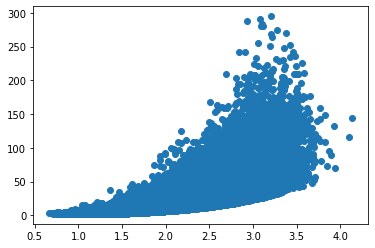

In [91]:
plt.scatter(np.log2(IRI1A.fc), IRI1A.neglogq)

In [1]:
import rpy2.ipython
%reload_ext rpy2.ipython

# suppress excessive warnings such as RRuntimeWarning
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

/auto/rcf-proj3/klj/kim130/miniconda3/envs/jupyter-R3.6/lib/python3.8/site-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


## Calling consensus peaks in Bioconductor

- Ref : https://ro-che.info/articles/2018-07-11-chip-seq-consensus

In [6]:
%%R
#library(UpSetR)
library(rtracklayer)
library(GenomicRanges)

## Getting total union peak set [No filter]

In [65]:
%%R
macs2_peak_files_unfiltered.files <- list.files(pattern =".*\\peaks.broadPeak")
macs2_peak_files_unfiltered.files

[1] "IRI1A_peaks.broadPeak"  "IRI2A_peaks.broadPeak"  "Sham1A_peaks.broadPeak"
[4] "Sham2A_peaks.broadPeak"


In [66]:
%%R
macs2_peak_files_unfiltered.granges <- lapply(macs2_peak_files_unfiltered.files, import)
macs2_peak_files_unfiltered.granges

[[1]]
GRanges object with 240761 ranges and 5 metadata columns:
           seqnames            ranges strand |              name     score
              <Rle>         <IRanges>  <Rle> |       <character> <numeric>
       [1]     chr1   3012435-3012743      * |      IRI1A_peak_1         0
       [2]     chr1   3014527-3015640      * |      IRI1A_peak_2         0
       [3]     chr1   3019513-3019738      * |      IRI1A_peak_3         0
       [4]     chr1   3026870-3027493      * |      IRI1A_peak_4         0
       [5]     chr1   3039077-3039284      * |      IRI1A_peak_5         3
       ...      ...               ...    ... .               ...       ...
  [240757]     chrY   9881596-9881797      * | IRI1A_peak_240757         0
  [240758]     chrY 10043114-10043337      * | IRI1A_peak_240758         0
  [240759]     chrY 10512796-10513008      * | IRI1A_peak_240759         1
  [240760]     chrY 41123356-41123789      * | IRI1A_peak_240760         0
  [240761]     chrY 41153398-4115357

In [67]:
%%R
macs2_peak_files_unfiltered.grangeslist <- GRangesList(macs2_peak_files_unfiltered.granges)
macs2_peak_files_unfiltered.grangeslist

GRangesList object of length 4:
[[1]] 
GRanges object with 240761 ranges and 5 metadata columns:
           seqnames            ranges strand |              name     score
              <Rle>         <IRanges>  <Rle> |       <character> <numeric>
       [1]     chr1   3012435-3012743      * |      IRI1A_peak_1         0
       [2]     chr1   3014527-3015640      * |      IRI1A_peak_2         0
       [3]     chr1   3019513-3019738      * |      IRI1A_peak_3         0
       [4]     chr1   3026870-3027493      * |      IRI1A_peak_4         0
       [5]     chr1   3039077-3039284      * |      IRI1A_peak_5         3
       ...      ...               ...    ... .               ...       ...
  [240757]     chrY   9881596-9881797      * | IRI1A_peak_240757         0
  [240758]     chrY 10043114-10043337      * | IRI1A_peak_240758         0
  [240759]     chrY 10512796-10513008      * | IRI1A_peak_240759         1
  [240760]     chrY 41123356-41123789      * | IRI1A_peak_240760         0
  [

In [68]:
%%R
macs2_peak_files_unfiltered.coverage <- coverage(macs2_peak_files_unfiltered.grangeslist)
macs2_peak_files_unfiltered.coverage

RleList of length 21
$chr1
integer-Rle of length 195309171 with 149926 runs
  Lengths: 3003426     444    8564      63 ...      20     187      83      10
  Values :       0       1       0       1 ...       1       3       2       1

$chr10
integer-Rle of length 130542265 with 96465 runs
  Lengths: 3170106     190    2598     164 ...     605       1      34       4
  Values :       0       1       0       1 ...       4       3       2       1

$chr11
integer-Rle of length 121977616 with 82210 runs
  Lengths: 3201954     115       7       1 ...    9015     290   11267     190
  Values :       0       1       2       3 ...       0       1       0       1

$chr12
integer-Rle of length 120002754 with 84471 runs
  Lengths: 3098110      26       3      15 ...     271     184    9280     193
  Values :       0       1       2       3 ...       2       1       0       1

$chr13
integer-Rle of length 120313820 with 80142 runs
  Lengths: 3045440     177     212      12 ...    1917     261    87

In [77]:
%%R
# slice function : https://support.bioconductor.org/p/83326/
# https://www.rdocumentation.org/packages/IRanges/versions/2.6.1/topics/slice-methods
# lower : the regions in the genome where coverage is at least 2
macs2_peak_files_unfiltered.covered_ranges <- slice(macs2_peak_files_unfiltered.coverage, lower=1, rangesOnly=T)
macs2_peak_files_unfiltered.covered_ranges <- GRanges(macs2_peak_files_unfiltered.covered_ranges)
macs2_peak_files_unfiltered.covered_ranges

GRanges object with 374668 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1   3003427-3003870      *
       [2]     chr1   3012435-3012785      *
       [3]     chr1   3014527-3015640      *
       [4]     chr1   3019513-3019738      *
       [5]     chr1   3026870-3027493      *
       ...      ...               ...    ...
  [374664]     chrY 10561059-10561294      *
  [374665]     chrY 41089491-41089671      *
  [374666]     chrY 41122766-41123933      *
  [374667]     chrY 41153012-41153221      *
  [374668]     chrY 41153398-41153576      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


#### Total Union peak : 374,668 peaks

In [79]:
%%R
# reduce function: reduce returns an object of the same type as x containing reduced ranges for each distinct
# (seqname, strand) pairing. The names (names(x)) and the metadata columns in x are dropped.
# See ?reduce for more information about range reduction and for a description of the optional arguments.
# More : https://www.rdocumentation.org/packages/GenomicRanges/versions/1.24.1/topics/inter-range-methods
macs2_peak_files_unfiltered.merged_covered_ranges <- reduce(macs2_peak_files_unfiltered.covered_ranges, 
                                                            min.gapwidth=500)

macs2_peak_files_unfiltered.merged_covered_ranges

GRanges object with 357013 ranges and 0 metadata columns:
           seqnames            ranges strand
              <Rle>         <IRanges>  <Rle>
       [1]     chr1   3003427-3003870      *
       [2]     chr1   3012435-3012785      *
       [3]     chr1   3014527-3015640      *
       [4]     chr1   3019513-3019738      *
       [5]     chr1   3026870-3028381      *
       ...      ...               ...    ...
  [357009]     chrY 10512787-10513033      *
  [357010]     chrY 10561059-10561294      *
  [357011]     chrY 41089491-41089671      *
  [357012]     chrY 41122766-41123933      *
  [357013]     chrY 41153012-41153576      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


#### Merged Union peaks (nearby threshold 500bp) : 357,013

In [80]:
%%R
export(macs2_peak_files_unfiltered.merged_covered_ranges, "post_macs2_peak-calling_consensus.noFilter.UNION.broadPeak.bed")

## Getting total union peak set [Filter FDR <= 0.01, len >= 250]

In [93]:
%%R
macs2_peak_files_filtered.files <- list.files(pattern =".*\\q.01.len250.broadPeak")
macs2_peak_files_filtered.granges <- lapply(macs2_peak_files_filtered.files, import)
macs2_peak_files_filtered.grangeslist <- GRangesList(macs2_peak_files_filtered.granges)
macs2_peak_files_filtered.coverage <- coverage(macs2_peak_files_filtered.grangeslist)
macs2_peak_files_filtered.covered_ranges <- slice(macs2_peak_files_filtered.coverage, lower=1, rangesOnly=T)
macs2_peak_files_filtered.covered_ranges <- GRanges(macs2_peak_files_filtered.covered_ranges)
macs2_peak_files_filtered.covered_ranges

GRanges object with 107460 ranges and 0 metadata columns:
           seqnames          ranges strand
              <Rle>       <IRanges>  <Rle>
       [1]     chr1 3116593-3117640      *
       [2]     chr1 3119338-3121591      *
       [3]     chr1 3126063-3126476      *
       [4]     chr1 3154842-3157891      *
       [5]     chr1 3176551-3176879      *
       ...      ...             ...    ...
  [107456]     chrY 1254838-1255276      *
  [107457]     chrY 2308813-2309456      *
  [107458]     chrY 5670911-5671236      *
  [107459]     chrY 5920093-5920381      *
  [107460]     chrY 9389661-9390192      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


In [122]:
%%R
print(mcols(macs2_peak_files_filtered.covered_ranges))

DataFrame with 107460 rows and 0 columns


#### Total Union peak : 107,460 peaks

In [94]:
%%R
macs2_peak_files_filtered.merged_covered_ranges <- reduce(macs2_peak_files_filtered.covered_ranges, 
                                                            min.gapwidth=500)
macs2_peak_files_filtered.merged_covered_ranges

GRanges object with 107371 ranges and 0 metadata columns:
           seqnames          ranges strand
              <Rle>       <IRanges>  <Rle>
       [1]     chr1 3116593-3117640      *
       [2]     chr1 3119338-3121591      *
       [3]     chr1 3126063-3126476      *
       [4]     chr1 3154842-3157891      *
       [5]     chr1 3176551-3176879      *
       ...      ...             ...    ...
  [107367]     chrY 1254838-1255276      *
  [107368]     chrY 2308813-2309456      *
  [107369]     chrY 5670911-5671236      *
  [107370]     chrY 5920093-5920381      *
  [107371]     chrY 9389661-9390192      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


In [123]:
%%R
print(mcols(macs2_peak_files_filtered.merged_covered_ranges))

DataFrame with 107371 rows and 0 columns


#### Merged Union peaks (nearby threshold 500bp) : 107,371

In [95]:
%%R
export(macs2_peak_files_filtered.merged_covered_ranges,
       "post_macs2_peak-calling_consensus.q.01.len250.UNION.broadPeak.bed")

### Individual files

In [127]:
%%R
merge_covered_range <- function(pattern=".*\\q.01.len250.broadPeak") {   
    macs2_peak_files_filtered.files <- list.files(pattern=pattern)
    macs2_peak_files_filtered.granges <- lapply(macs2_peak_files_filtered.files, import)
    macs2_peak_files_filtered.grangeslist <- GRangesList(macs2_peak_files_filtered.granges)
    macs2_peak_files_filtered.coverage <- coverage(macs2_peak_files_filtered.grangeslist)
    macs2_peak_files_filtered.covered_ranges <- slice(macs2_peak_files_filtered.coverage, lower=1, rangesOnly=T)
    macs2_peak_files_filtered.covered_ranges <- GRanges(macs2_peak_files_filtered.covered_ranges)
    macs2_peak_files_filtered.covered_ranges
    print(mcols(macs2_peak_files_filtered.covered_ranges))
    macs2_peak_files_filtered.merged_covered_ranges <- reduce(macs2_peak_files_filtered.covered_ranges, 
                                                            min.gapwidth=500)
    print(mcols(macs2_peak_files_filtered.merged_covered_ranges))
   return(macs2_peak_files_filtered.merged_covered_ranges)   
 }

IRI1A

In [129]:
%%R
merge_covered_range(pattern="IRI1A_peaks.q.01.len250.broadPeak")

DataFrame with 82902 rows and 0 columns
DataFrame with 82902 rows and 0 columns
GRanges object with 82902 ranges and 0 metadata columns:
          seqnames          ranges strand
             <Rle>       <IRanges>  <Rle>
      [1]     chr1 3119639-3120688      *
      [2]     chr1 3248952-3249591      *
      [3]     chr1 3346784-3350416      *
      [4]     chr1 3372578-3373177      *
      [5]     chr1 3399855-3401447      *
      ...      ...             ...    ...
  [82898]     chrY 1009981-1010813      *
  [82899]     chrY 1178532-1178922      *
  [82900]     chrY 1212311-1212621      *
  [82901]     chrY 1244877-1246086      *
  [82902]     chrY 5920093-5920381      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


IRI2A

In [130]:
%%R
merge_covered_range(pattern="IRI2A_peaks.q.01.len250.broadPeak")

DataFrame with 81982 rows and 0 columns
DataFrame with 81982 rows and 0 columns
GRanges object with 81982 ranges and 0 metadata columns:
          seqnames          ranges strand
             <Rle>       <IRanges>  <Rle>
      [1]     chr1 3119611-3121591      *
      [2]     chr1 3248840-3249563      *
      [3]     chr1 3349863-3350345      *
      [4]     chr1 3372589-3373160      *
      [5]     chr1 3399825-3401532      *
      ...      ...             ...    ...
  [81978]     chrY 1009997-1010824      *
  [81979]     chrY 1066936-1067213      *
  [81980]     chrY 1178532-1178929      *
  [81981]     chrY 1212334-1212585      *
  [81982]     chrY 1244692-1246098      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


SHAM1A

In [131]:
%%R
merge_covered_range(pattern="SHAM1A_peaks.q.01.len250.broadPeak")

DataFrame with 77309 rows and 0 columns
DataFrame with 77309 rows and 0 columns
GRanges object with 77309 ranges and 0 metadata columns:
          seqnames          ranges strand
             <Rle>       <IRanges>  <Rle>
      [1]     chr1 3116796-3117640      *
      [2]     chr1 3119338-3120744      *
      [3]     chr1 3155407-3156015      *
      [4]     chr1 3248813-3251126      *
      [5]     chr1 3349863-3350442      *
      ...      ...             ...    ...
  [77305]     chrY 1244764-1246080      *
  [77306]     chrY 1254838-1255276      *
  [77307]     chrY 2308823-2309168      *
  [77308]     chrY 5670911-5671236      *
  [77309]     chrY 9389697-9390192      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


SHAM2A

In [132]:
%%R
merge_covered_range(pattern="SHAM2A_peaks.q.01.len250.broadPeak")

DataFrame with 81374 rows and 0 columns
DataFrame with 81374 rows and 0 columns
GRanges object with 81374 ranges and 0 metadata columns:
          seqnames          ranges strand
             <Rle>       <IRanges>  <Rle>
      [1]     chr1 3116593-3117536      *
      [2]     chr1 3119604-3120580      *
      [3]     chr1 3126063-3126476      *
      [4]     chr1 3154842-3157891      *
      [5]     chr1 3176551-3176879      *
      ...      ...             ...    ...
  [81370]     chrY 1212157-1212604      *
  [81371]     chrY 1244877-1246082      *
  [81372]     chrY 1254841-1255169      *
  [81373]     chrY 2308813-2309456      *
  [81374]     chrY 9389661-9390019      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


### Using R 3.6 Biocmanger for ChIPQC and soGGi

https://rockefelleruniversity.github.io/RU_ATAC_Workshop.html#greenleaf-dataset---annotating-open-regions.

## Load consensus - intersection data -making bedGraph

In [2]:
%%R
library(soGGi)

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which

%%R
library(doMC)
registerDoMC(2)

In [15]:
%%R
library(ChIPQC)

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: DiffBind

R[write to console]: 



In [65]:
%%R
#https://rockefelleruniversity.github.io/RU_ATAC_Workshop.html
macs2_peak_files_filtered.files <- list.files(path="..",pattern=".*\\q.01.len250.broadPeak", full.names=TRUE)
macs2_peak_files_filtered.files

[1] "../IRI1A_peaks.q.01.len250.broadPeak" 
[2] "../IRI2A_peaks.q.01.len250.broadPeak" 
[3] "../SHAM1A_peaks.q.01.len250.broadPeak"
[4] "../SHAM2A_peaks.q.01.len250.broadPeak"


In [68]:
%%R
macs2_peak_files_filtered.granges <- lapply(macs2_peak_files_filtered.files, rtracklayer:::import)
macs2_peak_files_filtered.granges

[[1]]
GRanges object with 82902 ranges and 5 metadata columns:
          seqnames          ranges strand |              name     score
             <Rle>       <IRanges>  <Rle> |       <character> <numeric>
      [1]     chr1 3119639-3120688      * |     IRI1A_peak_14        41
      [2]     chr1 3248952-3249591      * |     IRI1A_peak_39        51
      [3]     chr1 3346784-3350416      * |     IRI1A_peak_46        32
      [4]     chr1 3372578-3373177      * |     IRI1A_peak_48       462
      [5]     chr1 3399855-3401447      * |     IRI1A_peak_50        94
      ...      ...             ...    ... .               ...       ...
  [82898]     chrY 1009981-1010813      * | IRI1A_peak_240704       384
  [82899]     chrY 1178532-1178922      * | IRI1A_peak_240719        67
  [82900]     chrY 1212311-1212621      * | IRI1A_peak_240720        30
  [82901]     chrY 1244877-1246086      * | IRI1A_peak_240722       222
  [82902]     chrY 5920093-5920381      * | IRI1A_peak_240743        25
 

In [69]:
%%R
names(macs2_peak_files_filtered.granges) <- c("IRI1A", "IRI2A", "SHAM1A", "SHAM2A")
#Group annotation for DESeq2
Group <- factor(c("IRI", "IRI", "SHAM", "SHAM"))
macs2_peak_files_filtered.grangeslist <- GRangesList(macs2_peak_files_filtered.granges)
macs2_peak_files_filtered.grangeslist

GRangesList object of length 4:
$IRI1A
GRanges object with 82902 ranges and 5 metadata columns:
          seqnames          ranges strand |              name     score
             <Rle>       <IRanges>  <Rle> |       <character> <numeric>
      [1]     chr1 3119639-3120688      * |     IRI1A_peak_14        41
      [2]     chr1 3248952-3249591      * |     IRI1A_peak_39        51
      [3]     chr1 3346784-3350416      * |     IRI1A_peak_46        32
      [4]     chr1 3372578-3373177      * |     IRI1A_peak_48       462
      [5]     chr1 3399855-3401447      * |     IRI1A_peak_50        94
      ...      ...             ...    ... .               ...       ...
  [82898]     chrY 1009981-1010813      * | IRI1A_peak_240704       384
  [82899]     chrY 1178532-1178922      * | IRI1A_peak_240719        67
  [82900]     chrY 1212311-1212621      * | IRI1A_peak_240720        30
  [82901]     chrY 1244877-1246086      * | IRI1A_peak_240722       222
  [82902]     chrY 5920093-5920381      

In [41]:
#https://rdrr.io/bioc/soGGi/man/findconsensusRegions.html

#findconsensusRegions(testRanges, bamFiles = NULL, method = "majority",
#  summit = "mean", resizepeak = "asw", overlap = "any",
#  fragmentLength = NULL, NonPrimaryPeaks = list(withinsample = "drop",
#  betweensample = "mean"))

In [70]:
%%R
reduced <- reduce(unlist(macs2_peak_files_filtered.grangeslist))
reduced

GRanges object with 107460 ranges and 0 metadata columns:
           seqnames          ranges strand
              <Rle>       <IRanges>  <Rle>
       [1]     chr1 3116593-3117640      *
       [2]     chr1 3119338-3121591      *
       [3]     chr1 3126063-3126476      *
       [4]     chr1 3154842-3157891      *
       [5]     chr1 3176551-3176879      *
       ...      ...             ...    ...
  [107456]     chrY 1254838-1255276      *
  [107457]     chrY 2308813-2309456      *
  [107458]     chrY 5670911-5671236      *
  [107459]     chrY 5920093-5920381      *
  [107460]     chrY 9389661-9390192      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths


In [71]:
%%R      
consensusIDs <- paste0("consensus_",seq(1,length(reduced)))
mcols(reduced) <- do.call(cbind,lapply(macs2_peak_files_filtered.grangeslist,function(x)(reduced %over% x)+0))
reducedConsensus <- reduced
reducedConsensus

GRanges object with 107460 ranges and 4 metadata columns:
           seqnames          ranges strand |     IRI1A     IRI2A    SHAM1A
              <Rle>       <IRanges>  <Rle> | <numeric> <numeric> <numeric>
       [1]     chr1 3116593-3117640      * |         0         0         1
       [2]     chr1 3119338-3121591      * |         1         1         1
       [3]     chr1 3126063-3126476      * |         0         0         0
       [4]     chr1 3154842-3157891      * |         0         0         1
       [5]     chr1 3176551-3176879      * |         0         0         0
       ...      ...             ...    ... .       ...       ...       ...
  [107456]     chrY 1254838-1255276      * |         0         0         1
  [107457]     chrY 2308813-2309456      * |         0         0         1
  [107458]     chrY 5670911-5671236      * |         0         0         1
  [107459]     chrY 5920093-5920381      * |         1         0         0
  [107460]     chrY 9389661-9390192      *

In [72]:
%%R
consensusIDs <- paste0("consensus_",seq(1,length(reducedConsensus)))
mcols(reducedConsensus) <- cbind(as.data.frame(mcols(reducedConsensus)),consensusIDs)

In [73]:
%%R
reducedConsensus

GRanges object with 107460 ranges and 5 metadata columns:
           seqnames          ranges strand |     IRI1A     IRI2A    SHAM1A
              <Rle>       <IRanges>  <Rle> | <numeric> <numeric> <numeric>
       [1]     chr1 3116593-3117640      * |         0         0         1
       [2]     chr1 3119338-3121591      * |         1         1         1
       [3]     chr1 3126063-3126476      * |         0         0         0
       [4]     chr1 3154842-3157891      * |         0         0         1
       [5]     chr1 3176551-3176879      * |         0         0         0
       ...      ...             ...    ... .       ...       ...       ...
  [107456]     chrY 1254838-1255276      * |         0         0         1
  [107457]     chrY 2308813-2309456      * |         0         0         1
  [107458]     chrY 5670911-5671236      * |         0         0         1
  [107459]     chrY 5920093-5920381      * |         1         0         0
  [107460]     chrY 9389661-9390192      *

In [75]:
%%R
reducedConsensus_df <- as.data.frame(reducedConsensus)
head(reducedConsensus_df)

  seqnames   start     end width strand IRI1A IRI2A SHAM1A SHAM2A consensusIDs
1     chr1 3116593 3117640  1048      *     0     0      1      1  consensus_1
2     chr1 3119338 3121591  2254      *     1     1      1      1  consensus_2
3     chr1 3126063 3126476   414      *     0     0      0      1  consensus_3
4     chr1 3154842 3157891  3050      *     0     0      1      1  consensus_4
5     chr1 3176551 3176879   329      *     0     0      0      1  consensus_5
6     chr1 3247295 3247547   253      *     0     0      0      1  consensus_6


In [77]:
%%R
write.csv(reducedConsensus_df, "./post_macs2_peak-calling_consensus.q.01.len250.consensus.intersections.bed", row.names=FALSE)

In [79]:
import pandas as pd

In [84]:
consensus_intersection_data = pd.read_csv("./post_macs2_peak-calling_consensus.q.01.len250.consensus.intersections.bed", sep=',', header=0)
consensus_intersection_data.head()

,seqnames,start,end,width,strand,IRI1A,IRI2A,SHAM1A,SHAM2A,consensusIDs
0,chr1,3116593,3117640,1048,*,0,0,1,1,consensus_1
1,chr1,3119338,3121591,2254,*,1,1,1,1,consensus_2
2,chr1,3126063,3126476,414,*,0,0,0,1,consensus_3
3,chr1,3154842,3157891,3050,*,0,0,1,1,consensus_4
4,chr1,3176551,3176879,329,*,0,0,0,1,consensus_5


In [85]:
set(consensus_intersection_data['seqnames'].to_list())

{'chr1',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chrX',
 'chrY'}

Preprocessing for UpSetR

In [86]:
consensus_intersection_data["Identifier"] = consensus_intersection_data.seqnames + ':' + \
                                            consensus_intersection_data.start.astype(str) + '-' + \
                                            consensus_intersection_data.end.astype(str)
consensus_intersection_data = consensus_intersection_data.drop(columns=['seqnames', 'start', 'end', 'width', 'strand', 'consensusIDs'])
#df = df[['mean', '0', '1', '2', '3']]
consensus_intersection_data = consensus_intersection_data[['Identifier', 'IRI1A', 'IRI2A', 'SHAM1A', 'SHAM2A']]
consensus_intersection_data.head()

,Identifier,IRI1A,IRI2A,SHAM1A,SHAM2A
0,chr1:3116593-3117640,0,0,1,1
1,chr1:3119338-3121591,1,1,1,1
2,chr1:3126063-3126476,0,0,0,1
3,chr1:3154842-3157891,0,0,1,1
4,chr1:3176551-3176879,0,0,0,1


Export csv file for UpSetR

In [87]:
consensus_intersection_data.to_csv("post_macs2_peak-calling_consensus.q.01.len250.consensus.intersections.UpSetR.csv",sep=',', index=False)

### Upset examples

In [91]:
%%R
library(UpSetR)

In [44]:
%%R
mutations <- read.csv( system.file("extdata", "mutations.csv", package = "UpSetR"), header=T, sep = ",")

In [51]:
%%R
head(mutations, n=3)

  Identifier TTN PTEN TP53 EGFR MUC16 FLG RYR2 PCLO PIK3R1 PIK3CA NF1 MUC17
1    02-0003   0    0    1    1     0   0    0    0      1      0   0     1
2    02-0033   0    0    1    0     0   0    0    0      0      1   1     0
3    02-0047   0    0    0    0     0   0    1    0      0      1   0     0
  HMCN1 SPTA1 USH2A RB1 PKHD1 OBSCN AHNAK2 RYR3 RELN FRAS1 GPR98 DNAH5 ATRX
1     0     0     0   0     0     0      0    0    0     0     0     1    0
2     0     0     0   1     0     0      0    0    0     0     0     0    0
3     0     0     0   0     0     0      0    1    0     0     0     0    0
  APOB TCHH SYNE1 LRP2 KEL HRNR DNAH3 COL6A3 MUC5B LAMA1 DSP DNAH8 CNTNAP2 SDK1
1    0    0     0    0   0    0     0      0     0     0   0     0       0    0
2    0    0     0    0   0    0     0      0     0     0   0     0       0    0
3    0    0     0    0   0    0     0      0     0     0   0     0       0    0
  NBPF10 DNAH2 NLRP5 MLL3 IDH1 HCN1 FCGBP DOCK5 RIMS2 PCDHA1 MXRA5 HEATR

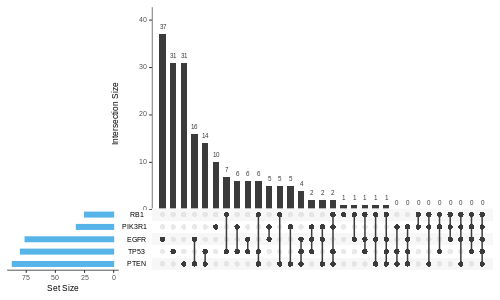

In [49]:
%%R -h 300 -w 500 -u px
upset(mutations, sets = c("PTEN", "TP53", "EGFR", "PIK3R1", "RB1"), sets.bar.color = "#56B4E9",
order.by = "freq", empty.intersections = "on")

Upset peak intersections

In [92]:
%%R
peak_intersections <- read.csv( "post_macs2_peak-calling_consensus.q.01.len250.consensus.intersections.UpSetR.csv", header=T, sep = ",")
head(peak_intersections, n=3)

            Identifier IRI1A IRI2A SHAM1A SHAM2A
1 chr1:3116593-3117640     0     0      1      1
2 chr1:3119338-3121591     1     1      1      1
3 chr1:3126063-3126476     0     0      0      1


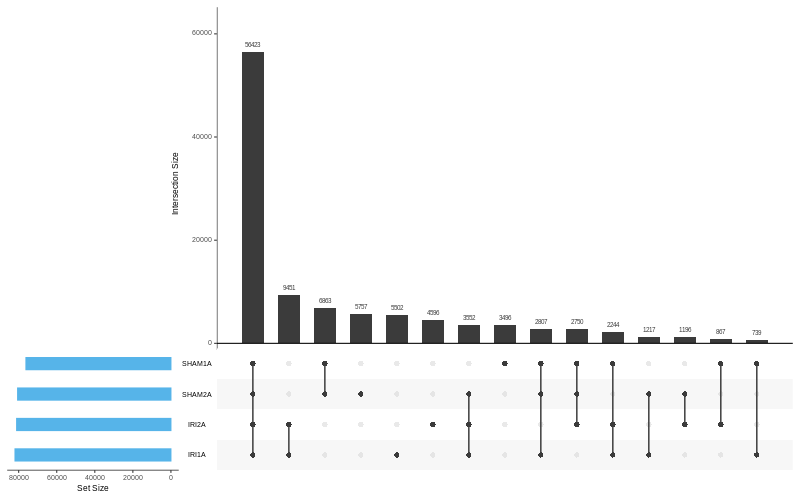

In [95]:
%%R  -h 500 -w 800 -u px
upset(peak_intersections, sets = c("IRI1A", "IRI2A", "SHAM1A", "SHAM2A"), sets.bar.color = "#56B4E9",
order.by = "freq", empty.intersections = "on")